# (a)

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# (b)

In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

# (c)

In [3]:
circuit = QuantumCircuit(q,c)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


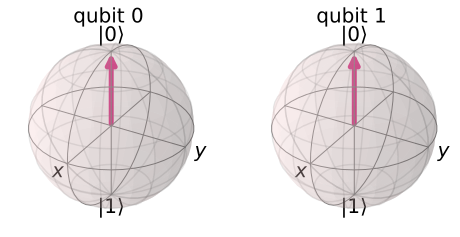

In [4]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)
plot_bloch_multivector(statevector)

# (d)

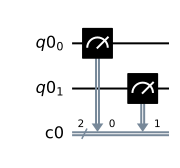

In [5]:
circuit.measure(q, c)

circuit.draw()

In [6]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()

print(counts)

{'00': 1024}


### It matches the calculation from the Born rule, $Pr(|00\rangle) = |1.+0.j|^2 = 1$.

# (e)

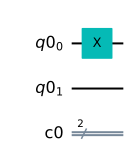

In [7]:
circuit = QuantumCircuit(q,c)

circuit.x(q[0])

circuit.draw()

/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


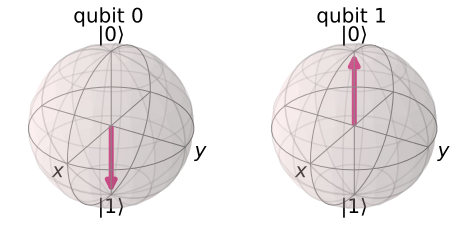

In [8]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

plot_bloch_multivector(statevector)

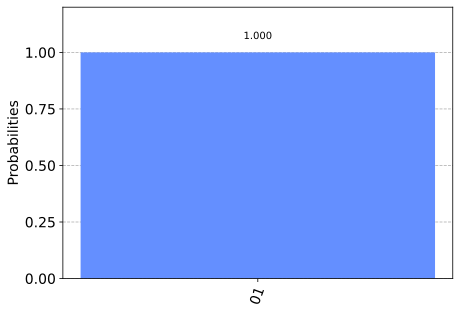

In [9]:
circuit.measure(q,c)
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### To check if it's equivalent to $X \otimes I$, let's try again.

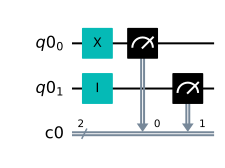

In [10]:
circuit = QuantumCircuit(q,c)

circuit.x(q[0])
circuit.i(q[1])
circuit.measure(q,c)

circuit.draw()

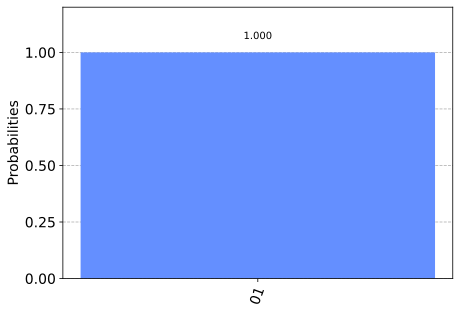

In [11]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### It's the same result!

# (f)

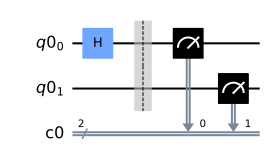

In [12]:
circuit = QuantumCircuit(q, c)

circuit.h(q[0])
circuit.barrier()
circuit.measure(q, c)

circuit.draw()

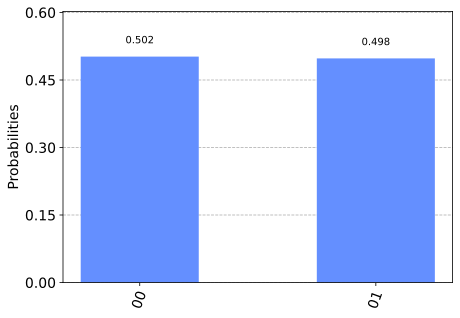

In [13]:
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### Let's try `H` after `H` to see if it's self-inverse.

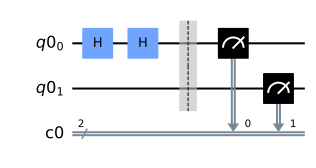

In [14]:
circuit = QuantumCircuit(q, c)

circuit.h(q[0])
circuit.h(q[0])
circuit.barrier()
circuit.measure(q, c)

circuit.draw()

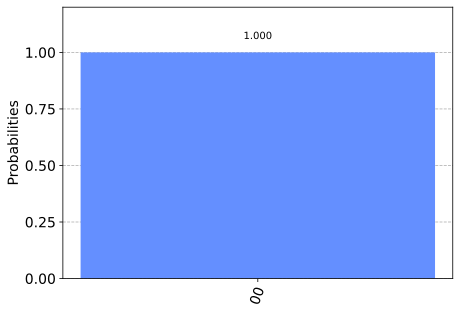

In [15]:
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

# (g)

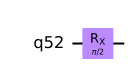

In [16]:
from math import pi

q = QuantumRegister(1)
circuit = QuantumCircuit(q)

circuit.rx(pi/2, q[0])

circuit.draw()

/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


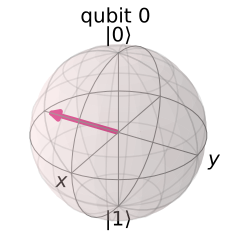

In [17]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

plot_bloch_multivector(statevector)

/var/folders/1s/h26s0qxx3_b3r_s010t_9dyc0000gn/T/ipykernel_40738/160918965.py:7: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  circuit.u3(pi/180*(90 - 23.46999), pi/180*120.95726, 0, 1)


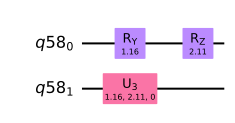

In [18]:
q = QuantumRegister(2)
circuit = QuantumCircuit(q)

# Mt. Jade coord. is 23.46999°N 120.95726°E
circuit.ry(pi/180*(90 - 23.46999), 0)
circuit.rz(pi/180*120.95726, 0)
circuit.u3(pi/180*(90 - 23.46999), pi/180*120.95726, 0, 1)

circuit.draw()

[ 0.34449715-0.60836711j  0.22599125+0.3990908j   0.22599125+0.3990908j
 -0.30077118-0.00753921j]


/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


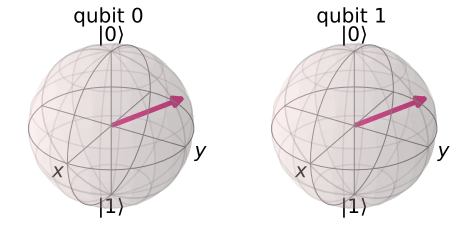

In [19]:
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)
plot_bloch_multivector(statevector)

### And that's where the state of Taiwan would be in a qubit.

# see (h) in `1 - (h).ipynb`